# Data Profiling
# 0. Set up

In [92]:
# import libraries
%matplotlib inline
import pandas as pd
import seaborn as sns
from cryptography.fernet import Fernet
from thefuzz import fuzz,process


# load data
df = pd.read_csv('input/dirty-loan-data.csv')
df.shape

(50100, 60)

In [93]:
df.head(5)

,Unnamed: 0,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,55978502,59640239,14400.0,14400.0,14400.0,36,5.61,50000.0,D,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,15278.0,15000.0
1,1,56141977,59803813,24550.0,24550.0,24550.0,36,2.29,50000.0,C,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,163368.0,41400.0
2,2,18935279,21167968,20000.0,20000.0,20000.0,60,6.29,50000.0,D,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,35408.0,28300.0
3,3,27580978,30084088,15000.0,15000.0,15000.0,36,-3.97,50000.0,A,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,146372.0,81600.0
4,4,4536779,5779043,16000.0,16000.0,15950.0,36,-1.10,50000.0,A,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,355820.0,45600.0


# 1. Create Data Profile

In [94]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Loan Dataset Profiling Report', minimal=True)
profile.to_file(output_file='output/profile/loan_data_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 1.1. Analyze Completeness
## 1.1.1. Missing Data

# 1.2. Analyze Integrity
## 1.2.1. Duplicates
To identify duplicates the first step is to remove the first column, which simply contains a row index. If we do not remove this column, the profiling will identify no rows as duplicates.

In [95]:
# drop first column
df = df.drop(columns='Unnamed: 0')

Looking at the output generated by the profiling, the first obvious problem is that the ID variables (**id_pk**, **id_member**) do not seem to be unique. This might be due to duplicated entries in the dataset. We can check this by filtering for all entries containing duplicated 'member_id' and order by 'member_id'.

In [96]:
# filter for all entries containing duplicated 'member_id' order by member_id
df[df.duplicated(subset='member_id', keep=False)].sort_values(by='member_id')

,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
50023,435307,520078,7000.0,7000.0,7000.000000,36,4.96,242.52,D,D2,...,NaN,Jul,2015.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
23,435307,520078,7000.0,7000.0,7000.000000,36,4.96,242.52,D,D2,...,NaN,Jul,2015.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
50011,526784,681457,11200.0,11200.0,11164.159885,36,3.23,378.62,C,C1,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
11,526784,681457,11200.0,11200.0,11164.159885,36,3.23,378.62,C,C1,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
50,558201,718601,7200.0,7200.0,7150.000000,60,7.56,181.12,E,E4,...,NaN,Feb,2015.0,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,67325141,72126853,28800.0,28800.0,28800.000000,60,0.64,621.03,B,B4,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,292439.0,36100.0
61,67367721,72179492,3000.0,3000.0,3000.000000,36,7.57,107.82,D,D4,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,101900.0,15300.0
50061,67367721,72179492,3000.0,3000.0,3000.000000,36,7.57,107.82,D,D4,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,101900.0,15300.0
50034,67828497,72687218,5000.0,5000.0,5000.000000,36,-4.68,150.58,A,A1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,45434.0,59700.0


Additionally we can also check for rows where all variables are identical. This will return a boolean series where True indicates that the row is a duplicate of a previous row. We can then sum the number of True values to get the number of duplicates.

In [97]:
# show number of duplicates where all rows are equal
df.duplicated().sum()

95

Looking at the output we can see that we indeed have 95 duplicated cases (here the duplicates are identified by rows that contain identical values for all variables). However, we have 200 rows with duplicated member IDs (Here we identify duplicates based on members IDs only). This means that we have some cases where the member ID is duplicated, but the other variables are not identical. This is a problem, as it indicates that we have some inconsistencies in the data. Now let's start by removing the rows where all variables are identical.

In [98]:
# remove duplicates
df = df.drop_duplicates()
df.shape

(50005, 59)

Now we can re-check if we still have duplicates in the member_id variable. As we can see in the output below this is indeed the case. The mistake seems to lie in the variable **installment** where we have differing values for the same case. This is likely a data error, as the variable **installment** should contain the monthly payment owed by the borrower. This means that the value 50000 is likely a mistake, as it is unlikely that a borrower would have to pay 50'000 per month when the loan amount is less then 50'000. We should therefore remove duplicated cases where installment is higher than the loan amount.

In [99]:
# filter for all entries containing duplicated 'member_id' order by member_id and installment
df[df.duplicated(subset='member_id', keep=False)].sort_values(by=['member_id', 'installment'])

,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
50004,4536779,5779043,16000.0,16000.0,15950.0,36,-1.10,508.06,A,A5,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,355820.0,45600.0
4,4536779,5779043,16000.0,16000.0,15950.0,36,-1.10,50000.00,A,A5,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,355820.0,45600.0
50002,18935279,21167968,20000.0,20000.0,20000.0,60,6.29,489.45,D,D2,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,35408.0,28300.0
2,18935279,21167968,20000.0,20000.0,20000.0,60,6.29,50000.00,D,D2,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,35408.0,28300.0
50003,27580978,30084088,15000.0,15000.0,15000.0,36,-3.97,456.54,A,A1,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,146372.0,81600.0
3,27580978,30084088,15000.0,15000.0,15000.0,36,-3.97,50000.00,A,A1,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,146372.0,81600.0
50000,55978502,59640239,14400.0,14400.0,14400.0,36,5.61,503.50,D,D1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,15278.0,15000.0
0,55978502,59640239,14400.0,14400.0,14400.0,36,5.61,50000.00,D,D1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,15278.0,15000.0
50001,56141977,59803813,24550.0,24550.0,24550.0,36,2.29,818.82,C,C1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,163368.0,41400.0
1,56141977,59803813,24550.0,24550.0,24550.0,36,2.29,50000.00,C,C1,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,163368.0,41400.0


In [100]:
# remove duplicates with higher installment
df = df.drop_duplicates(subset='member_id', keep='last')

In [101]:
# show row for member id 5779043
df[df['member_id'] == 5779043]

,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
50004,4536779,5779043,16000.0,16000.0,15950.0,36,-1.1,508.06,A,A5,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,355820.0,45600.0


## 1.2.2 Inconsistent Categories

### 1.2.2.1 Subgrade and Grade inconsistency
Another problem that becomes apparent when looking at the data is the discrepancy between the variables **grade** and **subgrade**. The **subgrade** variable is a subset of the **grade** variable. We can check this by looking at the unique values for both variables. However, we can see that the **subgrade** variable contains the nonsensical value *ALPHA_CENTAURI*. We need to address this issue by, first removing this value.

In [102]:
# show unique values for grade and subgrade
(df['grade'].unique(), df['sub_grade'].unique())

(array(['D', 'B', 'A', 'E', 'C', 'F', 'G'], dtype=object),
 array(['D3', 'B5', 'D1', 'A5', 'A4', 'E1', 'C1', 'C4', 'E2', 'B2', 'C2',
        'E5', 'C3', 'D2', 'ALPHA_CENTAURI', 'A2', 'C5', 'D5', 'D4', 'A1',
        'E3', 'B1', 'E4', 'B4', 'A3', 'F2', 'F4', 'F3', 'F1', 'G1', 'F5',
        'G2', 'G3', 'G4', 'G5'], dtype=object))

In [103]:
# Create a check that will delete any subgrade that is not a subset of grade
df['sub_grade'] = df['sub_grade'].apply(lambda x: x if x[0] in ['A', 'B', 'C', 'D', 'E', 'F', 'G'] and x[1].isdigit() else None)

# show unique values for grade and subgrade
df['sub_grade'].unique()

array(['D3', 'B5', 'D1', 'A5', 'A4', 'E1', 'C1', 'C4', 'E2', 'B2', 'C2',
       'E5', 'C3', 'D2', None, 'A2', 'C5', 'D5', 'D4', 'A1', 'E3', 'B1',
       'E4', 'B4', 'A3', 'F2', 'F4', 'F3', 'F1', 'G1', 'F5', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [104]:
# show rows for which sub_grade is NULL
df[df['sub_grade'].isnull()]

,id_pk,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_year,last_credit_pull_month,last_credit_pull_year,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
26,23943598,26316514,12000.0,12000.0,12000.0,36,0.99,392.81,B,None,...,2016.0,Jan,2016.0,1.0,1.0,INDIVIDUAL,0.0,88.0,182767.0,23000.0
54,56052266,59714104,14000.0,14000.0,14000.0,60,-0.01,297.39,B,None,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,169022.0,40200.0
79,63518237,67861038,10000.0,10000.0,10000.0,36,-0.01,322.63,B,None,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,406066.0,15500.0
96,50655756,54035485,15400.0,15400.0,15400.0,36,-0.01,496.85,B,None,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,43947.0,33200.0
102,48676289,51925085,21000.0,21000.0,21000.0,60,-0.01,446.09,B,None,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,25175.0,30980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49870,66380227,71104940,10000.0,10000.0,10000.0,36,-0.24,321.55,B,None,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,292127.0,8500.0
49922,3370575,4223512,6400.0,6400.0,6400.0,36,2.12,212.94,B,None,...,NaN,Jun,2015.0,0.0,1.0,INDIVIDUAL,0.0,0.0,50077.0,20694.0
49984,18294310,20447017,19500.0,19500.0,19500.0,60,0.99,423.89,B,None,...,NaN,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,56624.0,67700.0
49987,60952305,64994090,12000.0,12000.0,12000.0,36,-0.01,387.15,B,None,...,2016.0,Jan,2016.0,0.0,1.0,INDIVIDUAL,0.0,0.0,43481.0,43300.0


### 1.2.2.2 Interest Rate inconsistency
Another problem that becomes apparent when looking at the data is that the interest rate (**int_rate**) contains negative values. This is a mistake, as interest rates for loans should not be negative. We can check this by looking at the distribution of int_rate.

/Users/yanik/Library/Mobile Documents/com~apple~CloudDocs/Documents/Workshops and Courses/CAS_Data_Engineering/Kurs/Leistungsnachweise/Benotet/data_wrangling/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='int_rate', ylabel='Count'>

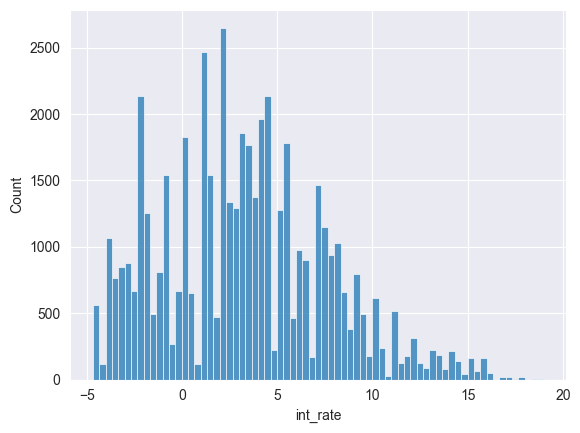

In [105]:
# show distribution of int_rate
sns.histplot(data=df, x='int_rate')

As the plot shows the distribution of **int_rate** encompasses negative values. It is difficult to determine if negative values in interest rate are created through an input error (e.g. instead of 5 the user inputed -5, such errors we would be able to correct by simply converting negative values to positive) or if the error is of another nature and the data is completely incorrect. As such, we err on the side of caution and remove all values for which **int_rate** is negative. We do not want to remove the complete row, since these might still contain valuable information for the other variables.

/Users/yanik/Library/Mobile Documents/com~apple~CloudDocs/Documents/Workshops and Courses/CAS_Data_Engineering/Kurs/Leistungsnachweise/Benotet/data_wrangling/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='int_rate', ylabel='Count'>

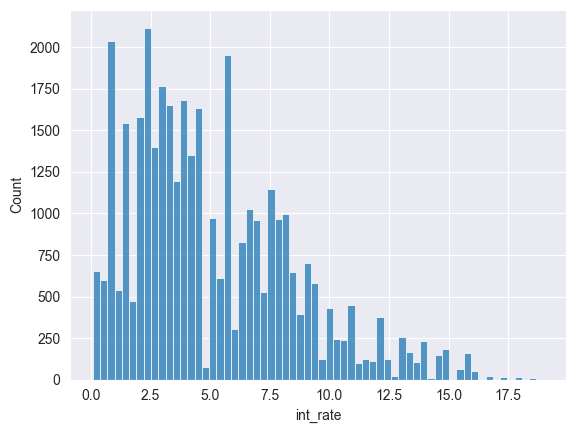

In [106]:
# replace negative values with NaN
df['int_rate'] = df['int_rate'].apply(lambda x: x if x > 0 else None)

# show distribution of int_rate
sns.histplot(data=df, x='int_rate')

# 1.3. Analyze Accuracy
## 1.3.1. Data Types and Formats
Another problem identified in the data are that at the moment dates are split into years and month. This becomes first visible when looking at the variables **issue_year** and **issue_month** as an example. Since we only have observations for 2015, this means that the **issue_year** variable by itself does not provide any useful information (no variation) in future analytical applications. Only in combination with the month, does the year provide useful information.

<Axes: xlabel='issue_year', ylabel='count'>

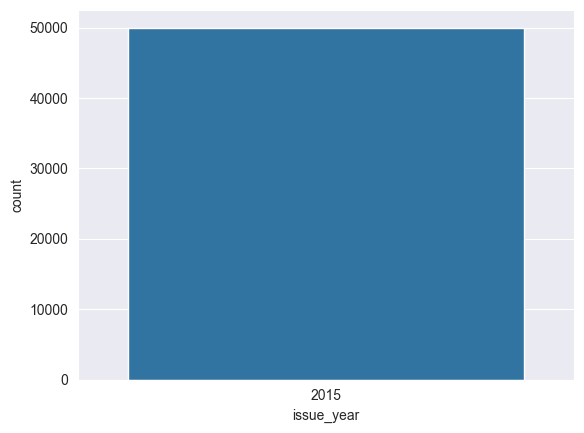

In [107]:
# show distribution of issue_year
sns.countplot(data=df, x='issue_year')

Contrary to **issue_year** the variable **issue_month** does show some variation, as shown in the plot below.

<Axes: xlabel='issue_month', ylabel='count'>

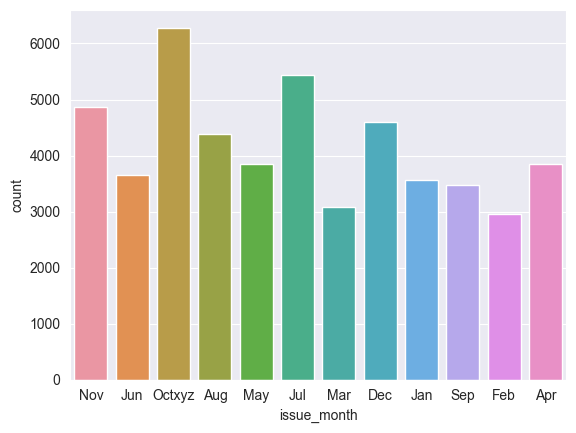

In [108]:
# show distribution of issue_month
sns.countplot(data=df, x='issue_month')

However, we also see that *October* was misspelled as *Octxyz*. We can fix this by replacing the misspelled value with the correct one.

In [109]:
# replace misspelled value
df['issue_month'] = df['issue_month'].replace('Octxyz', 'Oct')
df['issue_month'].unique()

array(['Nov', 'Jun', 'Oct', 'Aug', 'May', 'Jul', 'Mar', 'Dec', 'Jan',
       'Sep', 'Feb', 'Apr'], dtype=object)

To remedy the fact that issue_year contains no variation, but we still would like to know the year, we can create a new variable that combines the year and month into a single variable. This will allow us to keep the information about the year, but also the month. The same transformation can be applied to the other time variables in the dataset (earliest_cr_line_month, earliest_cr_line_year, last_pymnt_month, last_pymnt_year, next_pymnt_month, next_pymnt_year, last_credit_pull_month, last_credit_pull_year).

In [110]:
# create new variable issue_date with data type datetime
df['issue_date'] = pd.to_datetime(df['issue_year'].astype(str) + '-' + df['issue_month'], format='%Y-%b')

# drop issue_year and issue_month
df = df.drop(columns=['issue_year', 'issue_month'])

# show first 5 rows
df['issue_date'].head(5)

5   2015-11-01
6   2015-06-01
7   2015-10-01
8   2015-08-01
9   2015-05-01
Name: issue_date, dtype: datetime64[ns]

# 1.4. Text Issues
## 1.4.1. Text Harmonization
The **emp_title** variable contains 26'314 of different job titles. We can see this by looking at the number of unique values for **emp_title**.

In [111]:
df['emp_title'].nunique()

26314

Many of these job titles are likely to be the same, but are written in different ways. We can check this by looking at the unique values for **emp_title**.

In [112]:
# show unique values for emp_title and sort them
df['emp_title'].sort_values(ascending=False).unique()

array(['zueck transportation', 'zone manger', 'zone manager', ...,
       '  Credit rev specialist', '   Bus Operator and Instructor', nan],
      dtype=object)

As the example *zone manager* and *zone mager* shows, the difference in job titles might arise due to misspellings. Furthermore, we also have job titles like *youth specialist*, *youth services worker* or *youth development specialist* that are likely to be the same or very similar jobs, but that can be named differently. In order to try to reduce the cardinality of *emp_title* we can first convert all job titles to lower case and remove any leading or trailing white spaces.

In [113]:
# convert to lower case and remove leading and trailing white spaces
df['emp_title'] = df['emp_title'].str.lower().str.strip()

# count unique values
df['emp_title'].nunique()

23080

These two transformations alone managed to reduce the number of unique values by 3'234. Next we can try to further reduce the number of job titles by grouping toghether job titles that are similar. Looking at the top 20 job titles we can see for example already see that there are different variations of the manager job title. Furthermore, registerd nurse and rn are likely to be the same job title.

In [122]:
def top20(df):
    print(df['emp_title'].groupby(df['emp_title']).size().reset_index(name='count')\
          .sort_values(by='count', ascending=False).head(20)
         )

top20(df)

            emp_title  count
10794         manager   6182
18238         teacher   1210
1168        assistant   1180
12283           nurse   1180
5839           driver    882
17852      supervisor    445
12760           owner    438
15368           sales    388
13677       president    206
6274         engineer    180
19622  vice president    177
5215         director    175
13523  police officer    161
1381         attorney    142
169        accountant    137
18370      technician    129
826           analyst    116
16322          server    110
11129        mechanic    108
12930       paralegal     91


First we'll replace rn with registered nurse.

In [115]:
# replace rn with registered nurse
df['emp_title'] = df['emp_title'].replace('rn', 'registered nurse')

# show top 20 job titles
top20(df)

                emp_title  count
20618             teacher    997
12111             manager    872
16674    registered nurse    782
20200          supervisor    445
14438               owner    438
17408               sales    388
6644               driver    360
14052      office manager    275
15918     project manager    275
21502        truck driver    221
8613      general manager    219
15445           president    206
7143             engineer    180
22144      vice president    177
5988             director    175
17477       sales manager    174
15275      police officer    161
14231  operations manager    157
175       account manager    155
20025       store manager    147


Next we can try to group together job titles that are similar. In the output above we can identify many job titles that could be grouped into a larger category, such as teachers, managers, drivers, nurses, etc. We can do this by using the fuzzy match. The fuzzy match is a measure of similarity between two strings. The higher the score, the more similar the strings are. We set a threshold of 90, meaning that we only want to group together job titles that have a similarity score of 90 or higher.

In [117]:
def harmonise_with_threshold(col,cluster_string,threshold):
    for val, similarity in process.extract(cluster_string, df[col].unique(), limit = len(df[col].unique())):
        if similarity >= threshold:
            df.loc[df[col] == val, col] = cluster_string
            
# create list with cluster strings
cluster_list = ['manager', 'nurse', 'teacher', 'driver', 'assistant']

# harmonise job titles
for cluster_string in cluster_list:
    harmonise_with_threshold('emp_title', cluster_string, 90)

After grouping job titles via fuzzy match we can see that the number of unique job titles has been reduced to 20'507, thus we were able to reduce the number of unique job titles by 22%.

In [118]:
# show number of unique values for emp_title
df['emp_title'].nunique()

20507

# 1.5. Data Protection
We might want to encrypt some variables that contain sensitive information, such as the url. This is because the url might contain information that could be used to identify the borrower. In the case that we need to be able to convert the data back to its original form, we should use encryption. With encryption are able to use a key to encrypt and decrypt data.

In [35]:
# generate private key
private_key = Fernet.generate_key()

# create fernet object
fernet = Fernet(private_key)

# Ensure that 'url' column is of type string if not convert it
if isinstance(df['url'], str) is False:
    df['url'] = df['url'].astype(str)   

# encrypt url
df['url'] = df['url'].apply(lambda x: fernet.encrypt(x.encode()))
df[['member_id', 'url']].head(5)

,member_id,url
5,69697861,b'gAAAAABl4F0AChjRDjjSasQFnGscTzfagqbHCp8v_jo5...
6,949710,b'gAAAAABl4F0Au-LerLcFBBhWkV1ZEM-eLf4Iw_H9kxhq...
7,65632977,b'gAAAAABl4F0Aecrgr1yvIrRFkAtThi9Mlbd0NQRdPm28...
8,60837944,b'gAAAAABl4F0AN7gViM1mQpK3g8dfhJFNV6D6raTiPCIQ...
9,50629162,b'gAAAAABl4F0A6As7KQfFm9zvo8xF-uCqXgttJ479OlGR...


In [36]:
# decrypt url
df['url'] = df['url'].apply(lambda x: fernet.decrypt(x).decode())
df[['member_id', 'url']].head(5)

,member_id,url
5,69697861,https://www.lendingclub.com/browse/loanDetail....
6,949710,https://www.lendingclub.com/browse/loanDetail....
7,65632977,https://www.lendingclub.com/browse/loanDetail....
8,60837944,https://www.lendingclub.com/browse/loanDetail....
9,50629162,https://www.lendingclub.com/browse/loanDetail....


If we have to permanently anonymize the data we can replace the url with a hash value.

In [37]:
# encrypt url
df['url'] = df['url'].apply(lambda x: hash(x))
df[['member_id', 'url']].head(5)

,member_id,url
5,69697861,-8814843009496774992
6,949710,55170290497314171
7,65632977,826278682873749899
8,60837944,-1991869060018145608
9,50629162,698880114627605640
